# Analiza najboljših knjig na Goodreads

## Namen projekta

Cilj tega projekta je, da s pomočjo **programskega jezika Python** pridobim podatke s spletne strani [Goodreads](https://www.goodreads.com/list/show/1.Best_Books_Ever), jih obdelam in analiziram. Gre za spletno stran najbolje ocenjenih knjig, kot so jih izvolili člani Goodreads skupnosti, torej knjig ne ocenjujeo kritiki, temveč vsi bralci. Najdemo podatke o naslovu knjig, avtorju, povprečni oceni med 0 in 5, ter številu ocen.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt


In [115]:
df = pd.read_csv("../podatki/knjige.csv")
df.head()



,naslov,avtor,ocena
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.35 avg rating — 9,717,517 ratings"
1,Pride and Prejudice,Jane Austen,"4.29 avg rating — 4,703,968 ratings"
2,To Kill a Mockingbird,Harper Lee,"4.26 avg rating — 6,764,408 ratings"
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,"4.50 avg rating — 3,733,285 ratings"
4,The Book Thief,Markus Zusak,"4.39 avg rating — 2,832,122 ratings"


Sedaj spodaj ločimo oceno na povprečno oceno in število ocen

In [116]:
df["povprečna ocena"] = df["ocena"].str.extract(r"(\d\.\d+)").astype(float)
df["število ocen"] = (
    df["ocena"]
    .str.extract(r"—\s*([\d,]+)")  
    .replace(",", "", regex=True)
    .astype(int)
)


df.drop(columns=["ocena"], inplace=True)


df.head()


,naslov,avtor,povprečna ocena,število ocen
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.35,9717517
1,Pride and Prejudice,Jane Austen,4.29,4703968
2,To Kill a Mockingbird,Harper Lee,4.26,6764408
3,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.50,3733285
4,The Book Thief,Markus Zusak,4.39,2832122


## Analiza podatkov

Spodaj so prikazane analize ocen knjig:
- porazdelitev ocen,
- 10 najbolje ocenjenih,
- 10 najbolj ocenjenih knjig,
- 10 najbolje ocenjenih pisateljev,
- 10 najbolj ocenjenih pisateljev,
- graf, ki ponazarja vse povprečne ocene.

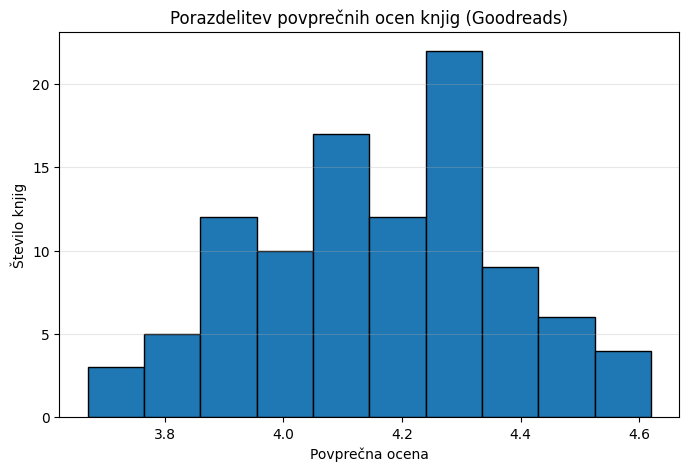

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df["povprečna ocena"], bins=10, edgecolor="black")

plt.xlabel("Povprečna ocena")
plt.ylabel("Število knjig")
plt.title("Porazdelitev povprečnih ocen knjig (Goodreads)")
plt.grid(axis="y", alpha=0.3)
plt.show()


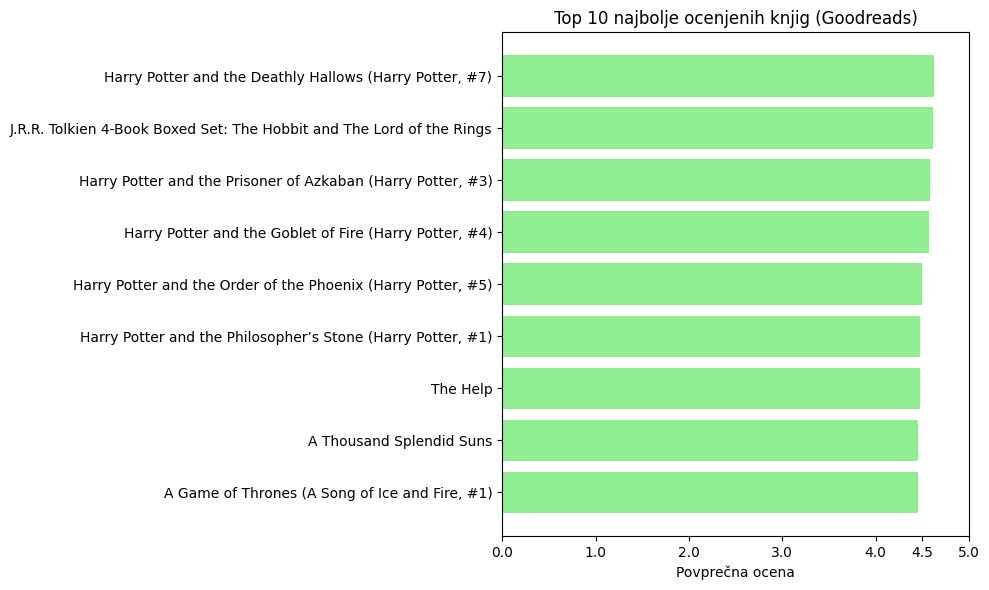

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top10 = df.sort_values("povprečna ocena", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["naslov"], top10["povprečna ocena"], color="lightgreen")
plt.gca().invert_yaxis()

ticks_main = np.arange(0, 5, 1)
ticks_extra = np.array([4.5, 5])
x_ticks = np.unique(np.concatenate((ticks_main, ticks_extra)))
plt.xticks(x_ticks)

plt.xlabel("Povprečna ocena")
plt.title("Top 10 najbolje ocenjenih knjig (Goodreads)")
plt.tight_layout()
plt.show()


Knjige na lestvici imajo zelo visoke ocene — večina med **4.0 in 4.5**. Povprečna ocena vseh analiziranih knjig je približno **4.2**, vidimo pa lahko, da se najbolje ocenjene knjige gibajo kar okoli **4.5** in da to število celo presežejo.

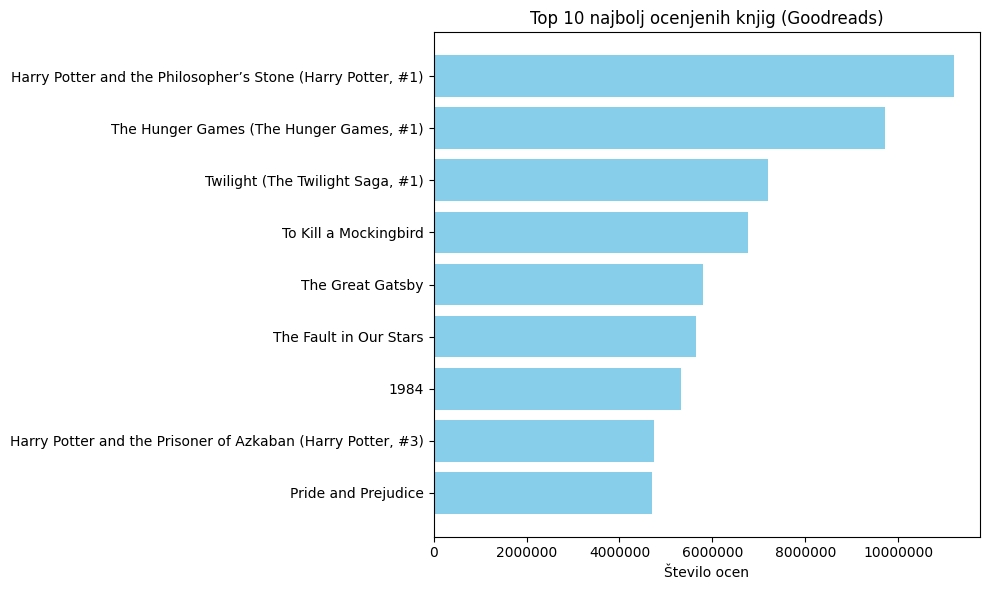

In [121]:
df["število ocen"] = pd.to_numeric(df["število ocen"], errors="coerce")

top10 = df.sort_values("število ocen", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["naslov"], top10["število ocen"], color="skyblue")
plt.gca().invert_yaxis()

plt.xlabel("Število ocen")
plt.title("Top 10 najbolj ocenjenih knjig (Goodreads)")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()



Najbolj priljubljene knjige, kot so *Harry Potter and the Sorcerer's Stone*, *1984* in *To Kill a Mockingbird*, imajo več milijonov ocen, kar kaže na njihovo veliko bralno skupnost, ta pa je še posebej vidna pri knjižni zbirki knjig *Harry Potter*.